<a href="https://colab.research.google.com/github/RTae/TensorFlow-in-Practice/blob/master/Course1/Week4/Image_Classification_with_Real-Word-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  # Your Code
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy') > 0.999):
      print('\nStop!!')
      self.model.stop_training = True

callbacks = myCallback()

--2020-06-14 15:01:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-06-14 15:01:00 (105 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [7]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_sad_dir = os.path.join('/tmp/h-or-s/sad')
train_happy_names = os.listdir(train_happy_dir)
train_sad_names = os.listdir(train_sad_dir)

print(train_happy_names[:10])
print(train_sad_names[:10])

['happy1-00.png', 'happy2-11.png', 'happy1-12.png', 'happy1-01.png', 'happy1-13.png', 'happy2-03.png', 'happy2-02.png', 'happy1-07.png', 'happy1-11.png', 'happy2-01.png']
['sad2-03.png', 'sad1-12.png', 'sad1-00.png', 'sad2-04.png', 'sad2-06.png', 'sad2-07.png', 'sad2-00.png', 'sad1-11.png', 'sad1-15.png', 'sad1-06.png']


['/tmp/h-or-s/sad/sad2-03.png', '/tmp/h-or-s/sad/sad1-12.png', '/tmp/h-or-s/sad/sad1-00.png', '/tmp/h-or-s/sad/sad2-04.png', '/tmp/h-or-s/sad/sad2-06.png', '/tmp/h-or-s/sad/sad2-07.png', '/tmp/h-or-s/sad/sad2-00.png', '/tmp/h-or-s/sad/sad1-11.png']


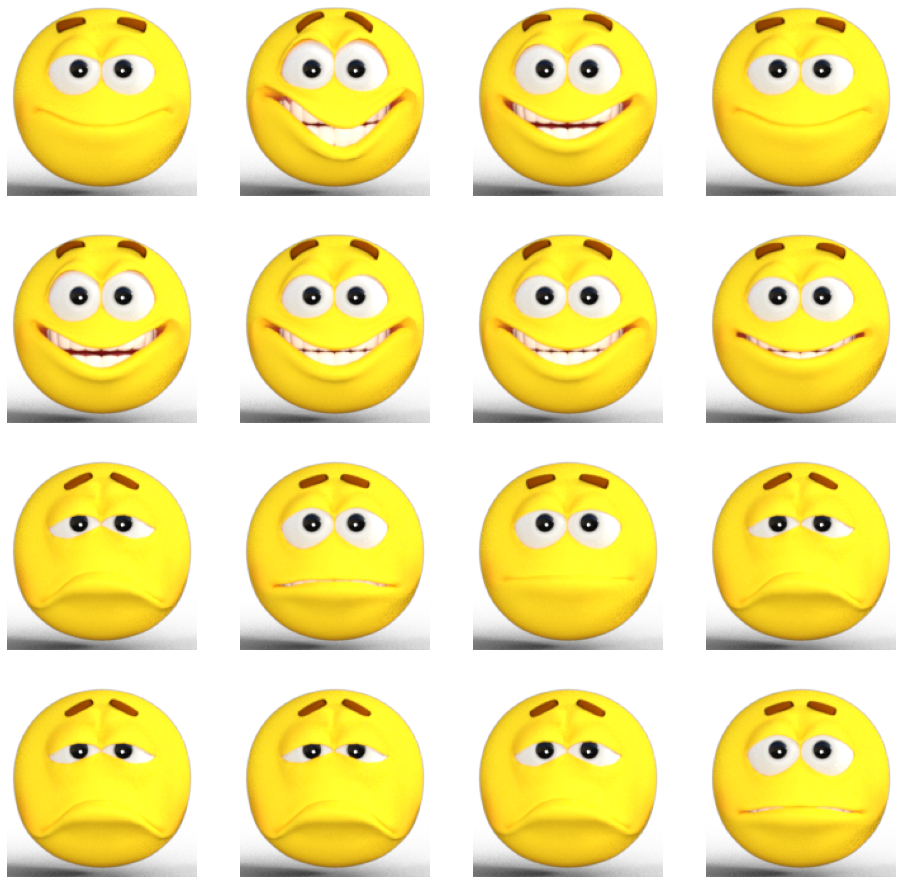

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [2]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
])
    
model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
train_generator = train_datagen.flow_from_directory(
        # Your Code Here
        '/tmp/h-or-s',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
    )

Found 80 images belonging to 2 classes.


In [4]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
          # Your Code Here
        train_generator,
        steps_per_epoch=8,  
        epochs=20,
        verbose=1,
        callbacks=[callbacks]
)
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
8/8 [==============================] - 0s 21ms/step - loss: 1.5603 - accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 0s 20ms/step - loss: 0.6493 - accuracy: 0.6375
Epoch 3/20
8/8 [==============================] - 0s 21ms/step - loss: 0.4527 - accuracy: 0.7875
Epoch 4/20
8/8 [==============================] - 0s 20ms/step - loss: 0.2372 - accuracy: 0.9375
Epoch 5/20
8/8 [==============================] - 0s 22ms/step - loss: 0.3708 - accuracy: 0.8000
Epoch 6/20
8/8 [==============================] - 0s 19ms/step - loss: 0.1216 - accuracy: 0.9750
Epoch 7/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0792 - accuracy: 0.9750
Epoch 8/20
8/8 [==============================] - 0s 20ms/step - loss: 0.1696 - accuracy: 0.9125
Epoch 9/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0541 - accuracy: 0.9875
Epoch 10/20
8/8 [==============================] - 0s 22ms/step - loss: 0.0747 - accuracy: 0.9750
Epoch 11/20
8/8 [============

In [17]:
path='/tmp/h-or-s/happy/happy1-12.png'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

[0.]


In [20]:
# This model is bias on training Data  because we use Artifact data so when use on real data it's cannot work

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is Sad")
  else:
    print(fn + " is Happy")

Saving Unknown.png to Unknown (2).png
[1.]
Unknown.png is Sad
